In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from transformers import pipeline
from collections import Counter


In [21]:
data = pd.read_csv("dataset.csv")

In [22]:
data['Foundation'] = None

In [23]:
data.head()

,Corpus,Tweet Text,Stance,Foundation
0,EVM,#EVMs are easy to manipulate . This was demons...,1,None
1,CAA,Congratulations Aa gya #CAA,1,None
2,CAA,My dear Indian muslims we are 35 crores of pop...,-1,None
3,CAA,This guy was part of anti Hindu protests in th...,1,None
4,CAA,Woman protester breaks down while speaking to ...,0,None


In [12]:
class_counts = data.iloc[:, 0].value_counts()

print("Number of rows for each class:")
print(class_counts)

total_rows = data.shape[0]
print("\nTotal number of rows:", total_rows)

Number of rows for each class:
Corpus
CAA                     207
UCC                     190
EVM                     181
LGBTQ                   172
Animal Sacrifices       166
Anti Conversion Laws    162
Brain Drain             148
Name: count, dtype: int64

Total number of rows: 1226


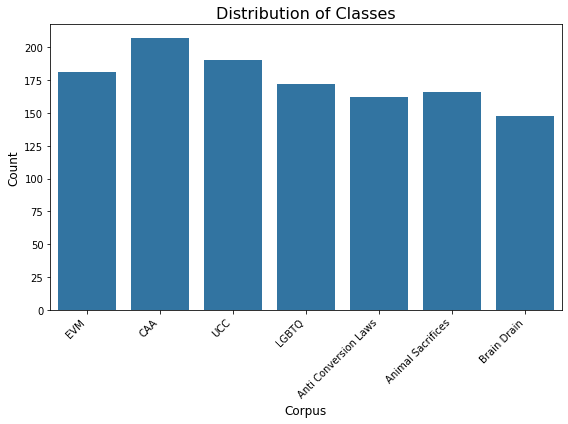

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Corpus', data=data)
plt.title('Distribution of Classes', fontsize=16)
plt.xlabel('Corpus', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

In [17]:
def clean_tweet(tweet):
    tweet = re.sub(r'@[\w_]+', '', tweet)  
    tweet = re.sub(r'#\w+', '', tweet)     
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  
    tweet = re.sub(r'[^A-Za-z0-9\s]+', '', tweet) 
    tweet = tweet.strip().lower()
    return tweet

In [24]:

data['cleaned_tweet'] = data['Tweet Text'].apply(clean_tweet)

In [25]:
data.head()

,Corpus,Tweet Text,Stance,Foundation,cleaned_tweet
0,EVM,#EVMs are easy to manipulate . This was demons...,1,None,are easy to manipulate this was demonstrated ...
1,CAA,Congratulations Aa gya #CAA,1,None,congratulations aa gya
2,CAA,My dear Indian muslims we are 35 crores of pop...,-1,None,my dear indian muslims we are 35 crores of pop...
3,CAA,This guy was part of anti Hindu protests in th...,1,None,this guy was part of anti hindu protests in th...
4,CAA,Woman protester breaks down while speaking to ...,0,None,woman protester breaks down while speaking to ...


### Zero Shot predictions for initial prdictions
####     -Using hugging face bart-large-mnli model for making predictions
####     -Classifying a total of 15% of the total tweets 

In [37]:
#classifier
classifier = pipeline("zero-shot-classification", model = "facebook/bart-large-mnli")

In [32]:
#data seg
zero_samples = data.sample(frac=0.15, random_state=42)
moral_foundations = ["Care", "Fairness", "Loyalty", "Authority", "Sanctity", "Liberty"]

In [38]:
ls .cache/huggingface/transformers

Invalid switch - "huggingface".


In [ ]:
#Zero shot classification 
#checking the thresholds


# Select threshold for final multi-label classification
final_threshold = 0.3
all_predicted_labels = []

for text in zero_shot_sample["text"]:
    result = classifier(text, candidate_labels)
    
    # Append selected labels
    selected_labels = [label for label, score in zip(result["labels"], result["scores"]) if score >= final_threshold]
    all_predicted_labels.extend(selected_labels)

# Count label occurrences
label_counts = Counter(all_predicted_labels)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title("Class Distribution after Zero-Shot Multi-Label Classification")
plt.xlabel("Moral Foundations")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


KeyboardInterrupt: 

In [ ]:
# Plot label counts vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, label_counts, marker='o')
plt.title("Threshold Tuning for Multi-Label Classification")
plt.xlabel("Threshold")
plt.ylabel("Total Assigned Labels")
plt.grid()
plt.show()

In [26]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

text = "Helping the poor is a moral duty."
candidate_labels = ["Care", "Fairness", "Loyalty", "Authority", "Sanctity", "Liberty"]

# Perform zero-shot classification
result = classifier(text, candidate_labels)
print(result)


{'sequence': 'Helping the poor is a moral duty.', 'labels': ['Care', 'Liberty', 'Sanctity', 'Fairness', 'Authority', 'Loyalty'], 'scores': [0.5870230793952942, 0.09679284691810608, 0.0940442606806755, 0.08719964325428009, 0.0774305984377861, 0.057509563863277435]}
